In [1]:
# 구글 드라이브 마운트(cjyjob1993@gmail.com)
from google.colab import drive
drive.mount('/content/drive')

# lib 디렉토리를을 환경 변수에 추가
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/myCode/lib')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# 커스텀 라이브러리 임포트
import numpy_fixSeed
from func_debug_log import debug

In [3]:
# debug_log (0 : 미출력, 1 : 출력)
debug_flag = 1

# 퍼셉트론

입력층과 출력층으로 이루어진 단층 신경망.

## XOR 게이트 문제
선형 경계만을 만들 수 있어, XOR문제를 효과적으로 해결할 수 없다.

In [4]:
if debug_flag == 1 : debug('XOR 예시 데이터 만들기', __name__)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))

x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])

2022.12.02 00:56:54 __main__ XOR 예시 데이터 만들기


2022.12.02 00:56:54 __main__ XOR 예시 데이터 시각화


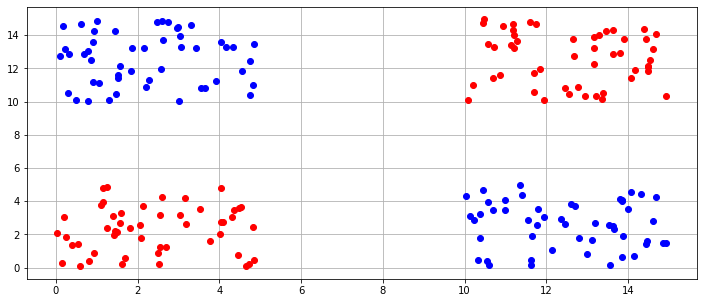

In [5]:
if debug_flag == 1 : debug('XOR 예시 데이터 시각화', __name__)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x_1[:, 0], x_1[:, 1], 'bo')
ax.plot(x_2[:, 0], x_2[:, 1], 'ro')
ax.grid()

In [ ]:
if debug_flag == 1 : debug('신경망 모델 구축', __name__)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
if debug_flag == 1 : debug('신경망 모델 컴파일', __name__)

model.compile(optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [ ]:
if debug_flag == 1 : debug('신경망 모델 학습', __name__)

model.fit(x, y, epochs=10)

In [ ]:
if debug_flag == 1 : debug('신경망 모델 예측 수행', __name__)

preds = model.predict(x) # 입력값 x에 대한 예측 수행
preds_1d = pred.flatten() # 1차원으로 변환
pred_class = np.where(preds_1d > 0.5, 1, 0) # 예측값을 0.5를 기준으로 0, 1로 변환

y_true = x[pred_class == 1]
y_false = x[pred_class == 0]


In [ ]:
if debug_flag == 1 : debug('신경망 모델 예측 결과 시각화', __name__)

fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(y_true[:, 0], y_true[:, 1], 'bo')
ax.plot(y_false[:, 0], y_false[:, 1], 'ro')
ax.grid